# Projet Optimisation et Apprentissage

## 1. Imports et configuration:

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Nombre de points par classe
n_points_per_class = 10

# Fixe la graine aléatoire pour reproduire les mêmes résultats
np.random.seed(42)  

## 2.   Génération et affichage des données 
 On va générer un dataset composé de 20 points 2D aléatoires. Chaque point aura un label parmi $\{-1,1\}$ de telle manière que :
    * chaque classe a le même nombre de points,
    * les points sont linéairement séparables. 

### 2.1 Génération des points pour la classe -1

In [36]:
# Génère 10 coordonnées x entre -1 et 0 pour la classe 1
x1_class1 = np.random.uniform(-1, 0, n_points_per_class)
# Génère 10 coordonnées y entre -1 et 0 pour la classe 1
x2_class1 = np.random.uniform(-1, 0, n_points_per_class)
class1 = np.column_stack((x1_class1, x2_class1))
labels_class1 = np.full(n_points_per_class, -1)

### 2.2 Génération des points pour la classe +1

In [37]:
# Génère 10 coordonnées x entre 0 et 1 pour la classe 2
x1_class2 = np.random.uniform(0, 1, n_points_per_class)
# Génère 10 coordonnées y entre 0 et 1 pour la classe 2
x2_class2 = np.random.uniform(0, 1, n_points_per_class)
# Crée un tableau 2D avec les coordonnées x et y
class2 = np.column_stack((x1_class2, x2_class2))
# Crée un tableau 1D avec les labels de la classe 2
labels_class2 = np.full(n_points_per_class, 1)

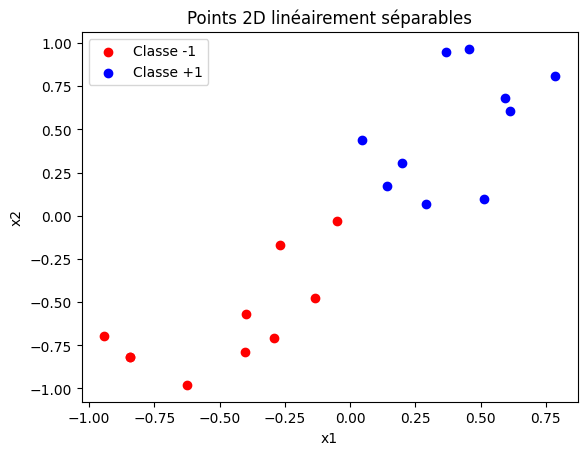

In [38]:
# Combine les deux classes
data = np.vstack((class1, class2))
# Combine les deux labels
labels = np.hstack((labels_class1, labels_class2))

# Affiche les données
plt.scatter(data[:n_points_per_class, 0], data[:n_points_per_class, 1], color='red', label='Classe -1')
plt.scatter(data[n_points_per_class:, 0], data[n_points_per_class:, 1], color='blue', label='Classe +1')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Points 2D linéairement séparables")
plt.show()

# Affiche les données
# for point, label in zip(data, labels):
#     print(f"Point: {point}, Label: {label}")

## 3. Implémenter le problème d'optimisation linéaire déterminant l'hyperplan optimal et donner l'équation de cet hyperplan

### 3.1 Imports

In [39]:
from mip import *

### 3.2 Fonction d'optimisation

In [40]:
def model_optimisation(data, labels):
    """
    Trouve la meilleure séparation linéaire entre deux classes de points.
    
    Args:
        data: Points 2D (array Nx2)
        labels: Labels des points (-1 ou 1)
        
    Returns:
        w1, w2, b: Paramètres de la ligne de séparation
    """
    m = Model("Séparation Linéaire")
    
    # Variables de décision
    w1 = m.add_var(name="w1")      # Coefficient de x1
    u1 = m.add_var(name="u1")      # Variable auxiliaire pour |w1|
    w2 = m.add_var(name="w2")      # Coefficient de x2
    u2 = m.add_var(name="u2")      # Variable auxiliaire pour |w2|
    b = m.add_var(name="b", lb=float("-inf"))    # Biais
    
    # Contraintes pour définir u1 = |w1| et u2 = |w2|
    m += u1 >= w1
    m += u1 >= -w1
    m += u2 >= w2
    m += u2 >= -w2
    
    # Contraintes de séparation
    for (x1, x2), label in zip(data, labels):
        m += label * (w1 * x1 + w2 * x2 + b) >= 1
    
    # Minimisation de la norme L1 de w
    m.objective = minimize(u1 + u2)    
    m.optimize()    
    
    print(f"Solution trouvée :")
    print(f"w1 = {w1.x}, w2 = {w2.x}, b = {b.x}")
    
    return w1.x, w2.x, b.x

### 3.3 Appliquer l'optimisation aux données générées

In [41]:
# Trouver la ligne de séparation optimale
w1, w2, b = model_optimisation(data, labels)

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 20 (-4) rows, 3 (-2) columns and 60 (-8) elements
Clp0006I 0  Obj 0 Primal inf 45.62584 (20)
Clp0000I Optimal - objective value 10.215629
Coin0511I After Postsolve, objective 10.215629, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 10.2156288 - 4 iterations time 0.002, Presolve 0.00
Solution trouvée :
w1 = 4.174238219920958, w2 = 6.041390576692084, b = -0.6124834385211595


### 3.4 Fonction de visualisation

In [42]:
def plot_data_and_separation(data, labels, w1, w2, b, n_points_per_class):
    """
    Affiche les points et la ligne de séparation.
    """
    plt.figure(figsize=(10, 8))
    
    # Affichage des points
    plt.scatter(data[:n_points_per_class, 0], data[:n_points_per_class, 1], 
               color='red', label='Classe -1', alpha=0.6, s=100)
    plt.scatter(data[n_points_per_class:, 0], data[n_points_per_class:, 1], 
               color='blue', label='Classe +1', alpha=0.6, s=100)

    # Ligne de séparation
    x = np.linspace(-1, 1, 100)
    y = -(w1 / w2) * x - (b / w2)
    plt.plot(x, y, color='green', label='Ligne de séparation')

    # Personnalisation
    plt.xlabel("x1", fontsize=12)
    plt.ylabel("x2", fontsize=12)
    plt.legend(fontsize=10)
    plt.title("Points 2D avec ligne de séparation optimale", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

### 3.5 Visualisation

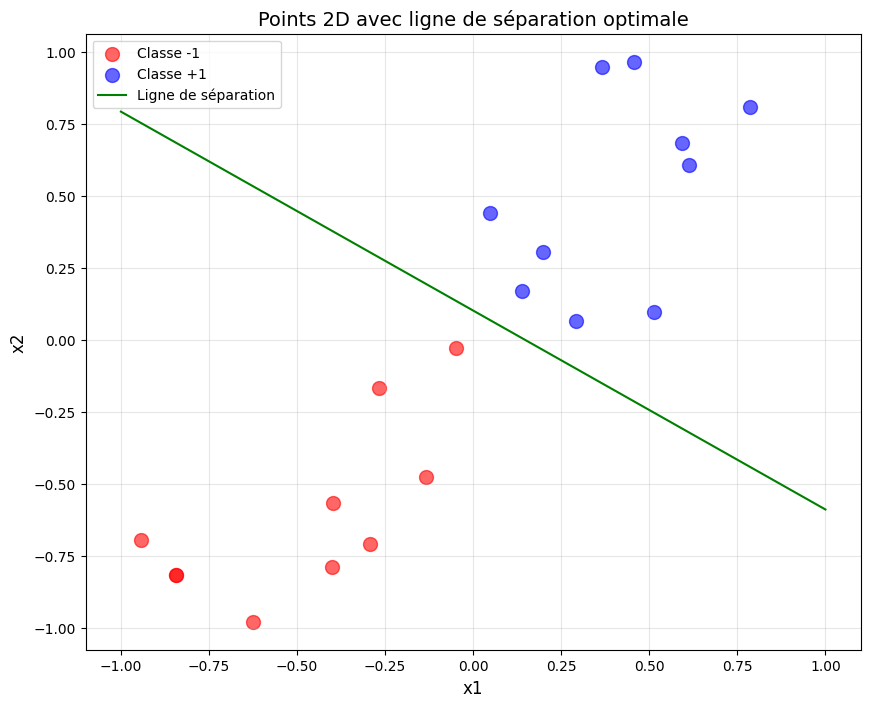


Points et leurs labels :
Point: [-0.62545988 -0.97941551], Label: -1
Point: [-0.04928569 -0.03009015], Label: -1
Point: [-0.26800606 -0.16755736], Label: -1
Point: [-0.40134152 -0.78766089], Label: -1
Point: [-0.84398136 -0.81817503], Label: -1
Point: [-0.84400548 -0.81659549], Label: -1
Point: [-0.94191639 -0.69575776], Label: -1
Point: [-0.13382385 -0.47524357], Label: -1
Point: [-0.39888499 -0.56805498], Label: -1
Point: [-0.29192742 -0.70877086], Label: -1
Point: [0.61185289 0.60754485], Label: 1
Point: [0.13949386 0.17052412], Label: 1
Point: [0.29214465 0.06505159], Label: 1
Point: [0.36636184 0.94888554], Label: 1
Point: [0.45606998 0.96563203], Label: 1
Point: [0.78517596 0.80839735], Label: 1
Point: [0.19967378 0.30461377], Label: 1
Point: [0.51423444 0.09767211], Label: 1
Point: [0.59241457 0.68423303], Label: 1
Point: [0.04645041 0.44015249], Label: 1


In [43]:
plot_data_and_separation(data, labels, w1, w2, b, n_points_per_class)

print("\nPoints et leurs labels :")
for point, label in zip(data, labels):
    print(f"Point: {point}, Label: {label}")